In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import seaborn as sns
import mglearn
from sklearn.datasets import load_boston
data = load_boston()

In [2]:
#making a dataframe and connecting feature names to the data.
df = pd.DataFrame(data['data'],columns = data['feature_names'])
df['MEDV'] = data['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
#preprocessing, using isnull to check if any values are zero
df.isnull().sum()
y = df['MEDV']
X = df.drop('MEDV',1)
print(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

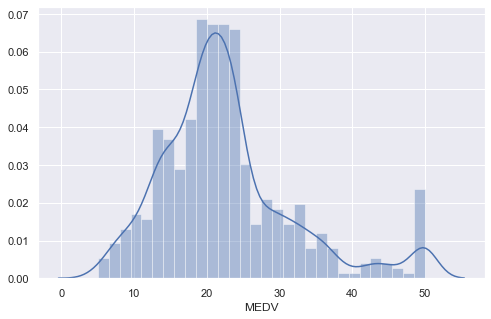

In [4]:
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(y,bins=30)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [26]:
#Task 1
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [27]:
linreg_train_predict = linreg.predict(X_train)
r2 = r2_score(y_train, linreg_train_predict)
rmse = np.sqrt(mean_squared_error(y_train, linreg_train_predict))
print('R2 for training: %.2f'%r2,'\nRMSE for training: %.2f'%rmse,'\n')

linreg_test_predict = linreg.predict(X_test)
r2 = r2_score(y_test,linreg_test_predict)
rmse = np.sqrt(mean_squared_error(y_test, linreg_test_predict))
print('R2 for test: %.2f'% r2,'\nRMSE for testing: %.2f'%rmse)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, linreg_test_predict))

R2 for training: 0.77 
RMSE for training: 4.43 

R2 for test: 0.64 
RMSE for testing: 5.46
Mean squared error: 29.78


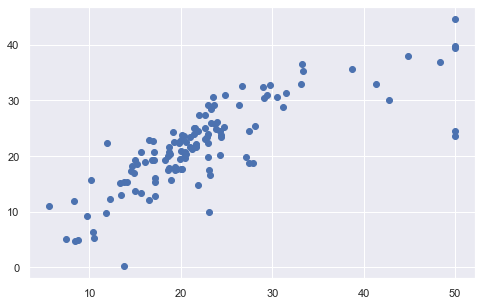

In [28]:
#plotting the y_test vs test_prediction
#should be a straight line
plt.scatter(y_test,linreg_test_predict)

In [29]:
#task2
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso_train_predict = lasso.predict(X_train)
r2 = r2_score(y_train, lasso_train_predict)

print('R2 for training: %.2f'%r2)

#test prediction
lasso_test_predict = lasso.predict(X_test)
r2 = r2_score(y_test,lasso_test_predict)
print('R2 for test: %.2f'% r2)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lasso_test_predict))

R2 for training: 0.73
R2 for test: 0.56
Mean squared error: 35.82


In [30]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
ridge_train_predict = ridge.predict(X_train)
r2 = r2_score(y_train, ridge_train_predict)

print('R2 for training: %.2f'%r2)

#test prediction
ridge_test_predict = ridge.predict(X_test)
r2 = r2_score(y_test,ridge_test_predict)
print('R2 for test: %.2f'% r2)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, ridge_test_predict))

R2 for training: 0.77
R2 for test: 0.63
Mean squared error: 29.88


In [31]:
from sklearn.model_selection import KFold,cross_val_score

linreg_scores = cross_val_score(linreg, X, y, cv= KFold(shuffle=True))
print('Linear regression score: ',linreg_scores,'\naverage:',np.mean(linreg_scores))

lasso_scores = cross_val_score(lasso, X, y, cv= KFold(shuffle=True))
print('\nLasso score: ',lasso_scores,'\naverage:',np.mean(lasso_scores))

ridge_scores = cross_val_score(ridge, X,y, cv= KFold(shuffle=True))
print('\nRidge score: ',ridge_scores,'\naverage:',np.mean(ridge_scores))

Linear regression score:  [0.76283701 0.72066816 0.73880772 0.68425926 0.70969174] 
average: 0.7232527776396981

Lasso score:  [0.67716412 0.590948   0.78113006 0.6959405  0.65823926] 
average: 0.6806843877222855

Ridge score:  [0.61759481 0.64772191 0.75742857 0.76087612 0.78840644] 
average: 0.7144055693896124


In [36]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes = [20,100], 
                  activation='relu',
                  alpha=0.01,
                  max_iter = 50000,
                  solver='lbfgs')
nn.fit(X,y)

MLPRegressor(alpha=0.01, hidden_layer_sizes=[20, 100], max_iter=50000,
             solver='lbfgs')

In [37]:
nn_train_predict = nn.predict(X_train)
r2 = r2_score(y_train, nn_train_predict)

print('R2 for training: %.2f'%r2)

#test prediction
nn_test_predict = nn.predict(X_test)
r2 = r2_score(y_test,nn_test_predict)
print('R2 for test: %.2f'% r2)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, nn_test_predict))

R2 for training: 0.98
R2 for test: 0.98
Mean squared error: 2.11
